In [1]:
import pandas as pd
import numpy as np
import torch
import os
import sys
from tqdm import tqdm, trange

sys.path.append("../../")
import biked_commons
from biked_commons.rendering import rendering

from biked_commons.data_loading import data_loading

Using java as the Java binary


In [2]:
data = data_loading.load_bike_bench_train()
display(data)

,CS textfield,BB textfield,Stack,Head angle,Head tube length textfield,Seat stay junction0,Seat tube length,Seat angle,DT Length,FORK0R,...,Handlebar style OHCLASS: 2,Stem kind OHCLASS: 0,Stem kind OHCLASS: 1,Stem kind OHCLASS: 2,Fork type OHCLASS: 0,Fork type OHCLASS: 1,Fork type OHCLASS: 2,Seat tube type OHCLASS: 0,Seat tube type OHCLASS: 1,Seat tube type OHCLASS: 2
3898,420.00,25.0,536.36066,70.0,112.8,45.0,400.0,73.0,648.36316,45.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2647,796.94,-3.0,363.41064,39.0,181.2,36.0,567.0,37.0,1243.38900,45.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4747,458.00,50.0,549.67426,63.5,159.9,45.0,460.0,76.0,742.93770,45.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2592,403.00,70.0,569.91583,73.0,134.0,258.0,516.8,79.0,627.59420,45.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3583,440.00,70.0,574.76190,74.0,125.2,45.0,579.6,74.0,651.83970,45.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,398.33,0.0,493.74484,71.0,90.0,45.0,270.6,74.0,606.50946,45.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3411,415.00,50.0,607.15045,72.5,153.0,185.0,702.0,74.0,665.03300,45.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1667,425.00,15.5,534.09784,72.5,143.0,80.0,420.0,73.0,668.93630,50.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2656,440.00,50.0,577.77940,75.0,146.0,45.0,580.0,75.0,658.82544,50.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3]:
renderer = rendering.RenderingEngine(number_rendering_servers = 1, server_init_timeout_seconds=120)

In [8]:
data1 = data.iloc[4]
from biked_commons.conditioning import conditioning
rider_condition = conditioning.sample_riders(1, split="test")[0]

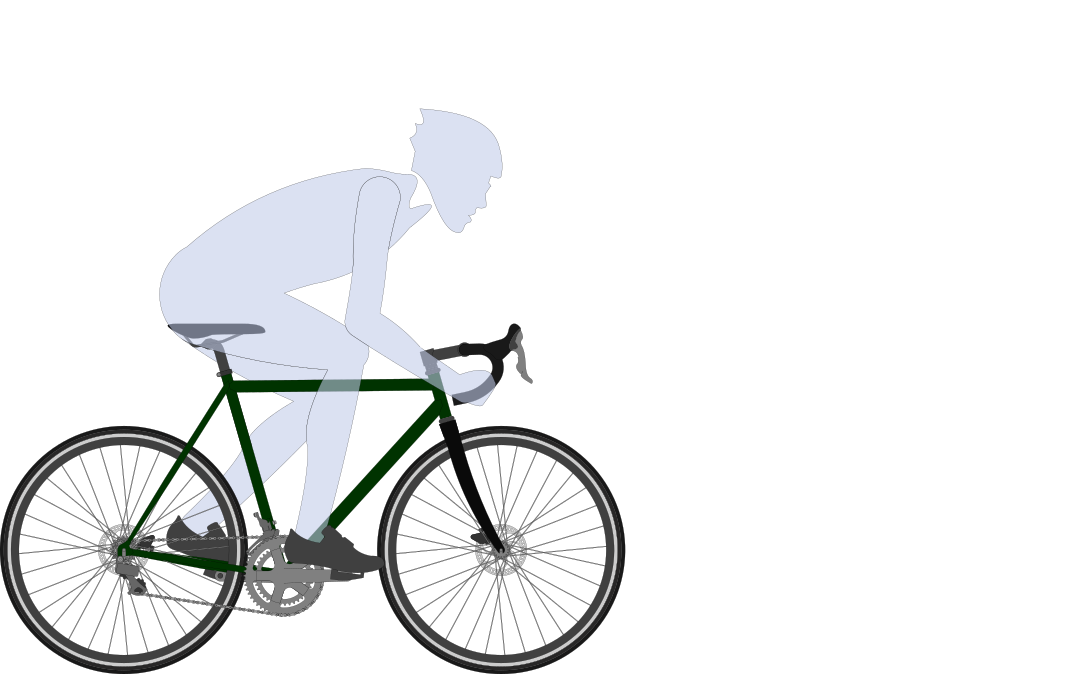

In [9]:
res = renderer.render_clip(data1, rider_dims=rider_condition)
svg = res.image_bytes
from IPython.display import SVG, display
display(SVG(svg))